# Init
- - -
## Data import

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.image import *

from tensorflow.keras.optimizers import *
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import importlib

import my_models as mds
import mytool as mt

import gc

np.set_printoptions(precision=6, suppress=True) # 과학적 표기법 e 대신 소수점 6자리까지만 나옴

<br/>

# Data 
- - -

In [26]:
#x_data =  np.load('/content/drive/MyDrive/Lab/AEDP/X.npy')
x_data =  np.load('./data/X_none_C.npy')
y_data =  np.load('./data/Y_none_C.npy')

In [27]:
x_data = x_data/255
x_data = np.expand_dims(x_data, -1)          
print(x_data.shape)
print(y_data.shape)

(3156, 150, 150, 1)
(3156,)


In [28]:
unique, counts = np.unique(y_data, return_counts=True)

result = np.column_stack((unique, counts)) 

print(result)

[[ 20 756]
 [ 30 564]
 [ 40 660]
 [ 50 519]
 [ 60 392]
 [ 70 265]]


In [29]:
# value, idx=np.unique(y_data,return_inverse=True)
# idx_list = []
# for i in range(len(idx)):
#     if(value[idx[i]] == 60 or value[idx[i]] == 70):
#          idx_list.append(i)

# y_data = np.delete(y_data, idx_list)
# x_data = np.delete(x_data, idx_list,0)

In [30]:
print(x_data.shape)
print(y_data.shape)

(3156, 150, 150, 1)
(3156,)


In [31]:
#data shuffle
nRow = x_data.shape[0]
idx_randmix = np.array(range(nRow))
np.random.seed(99)
np.random.shuffle(idx_randmix)
x_data = x_data[idx_randmix, :, :, :]
y_data = y_data[idx_randmix]

In [85]:
class MyCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self,epoch, logs=None):
        if( epoch % 100 == 0 ):
            print('      epoch : {}    loss  : {:.4f}    val_loss  : {:.4f}'.format(epoch+1,logs['loss'],logs['val_loss']))
            
    def on_train_end(self,logs=None):
        print('      train END => loss  : {:.4f}    val_loss  : {:.4f}'.format(logs['loss'],logs['val_loss']))
        
        
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, mode='min')



#####################################################################################################
Start 0-fold validation
#####################################################################################################


0_fold data setting done...


    ####################################################################
    0_fold data augmentation
    ####################################################################

    20 : 601
    30 : 447
    40 : 536
    50 : 412
    60 : 318
    70 : 211

       |
       V

    20 : 601
    30 : 447
    40 : 536
    50 : 412
    60 : 418
    70 : 361


    ####################################################################
    0_fold data normalization
    ####################################################################

    [20 30 40 50 60 70]

        |
        V

    [0 1 2 3 4 5]

        |
        V

    [0.083333 0.25     0.416667 0.583333 0.75     0.916667]


    #######################################################

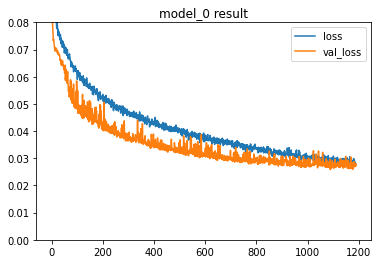

    RMSE Test = 0.16699085494813232


#####################################################################################################
Start 1-fold validation
#####################################################################################################


1_fold data setting done...


    ####################################################################
    1_fold data augmentation
    ####################################################################

    20 : 599
    30 : 466
    40 : 536
    50 : 410
    60 : 306
    70 : 208

       |
       V

    20 : 599
    30 : 466
    40 : 536
    50 : 410
    60 : 406
    70 : 358


    ####################################################################
    1_fold data normalization
    ####################################################################

    [20 30 40 50 60 70]

        |
        V

    [0 1 2 3 4 5]

        |
        V

    [0.083333 0.25     0.416667 0.583333 0.75     0.916667]


    ###################

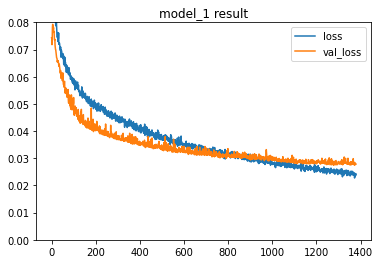

    RMSE Test = 0.16684632897171495


#####################################################################################################
Start 2-fold validation
#####################################################################################################


2_fold data setting done...


    ####################################################################
    2_fold data augmentation
    ####################################################################

    20 : 617
    30 : 450
    40 : 511
    50 : 420
    60 : 315
    70 : 211

       |
       V

    20 : 617
    30 : 450
    40 : 511
    50 : 420
    60 : 415
    70 : 361


    ####################################################################
    2_fold data normalization
    ####################################################################

    [20 30 40 50 60 70]

        |
        V

    [0 1 2 3 4 5]

        |
        V

    [0.083333 0.25     0.416667 0.583333 0.75     0.916667]


    ###################

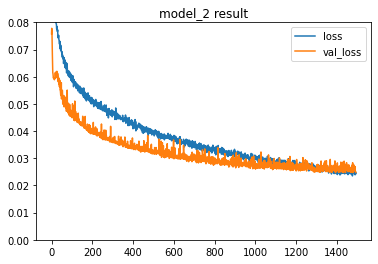

    RMSE Test = 0.15748413198035272


#####################################################################################################
Start 3-fold validation
#####################################################################################################


3_fold data setting done...


    ####################################################################
    3_fold data augmentation
    ####################################################################

    20 : 607
    30 : 443
    40 : 524
    50 : 418
    60 : 320
    70 : 213

       |
       V

    20 : 607
    30 : 443
    40 : 524
    50 : 418
    60 : 420
    70 : 363


    ####################################################################
    3_fold data normalization
    ####################################################################

    [20 30 40 50 60 70]

        |
        V

    [0 1 2 3 4 5]

        |
        V

    [0.083333 0.25     0.416667 0.583333 0.75     0.916667]


    ###################

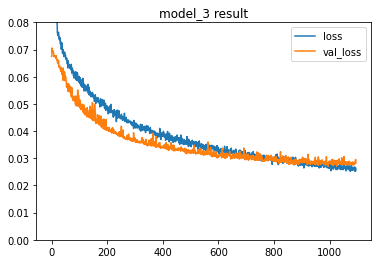

    RMSE Test = 0.1681863598244692


#####################################################################################################
Start 4-fold validation
#####################################################################################################


4_fold data setting done...


    ####################################################################
    4_fold data augmentation
    ####################################################################

    20 : 600
    30 : 450
    40 : 533
    50 : 416
    60 : 309
    70 : 217

       |
       V

    20 : 600
    30 : 450
    40 : 533
    50 : 416
    60 : 409
    70 : 367


    ####################################################################
    4_fold data normalization
    ####################################################################

    [20 30 40 50 60 70]

        |
        V

    [0 1 2 3 4 5]

        |
        V

    [0.083333 0.25     0.416667 0.583333 0.75     0.916667]


    ####################

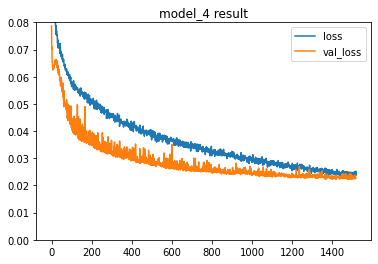

    RMSE Test = 0.15068200381752805


#####################################################################################################
END
#####################################################################################################
models_rmse => [0.16699085494813232, 0.16684632897171495, 0.15748413198035272, 0.1681863598244692, 0.15068200381752805] 


In [90]:
#######################################################################
# 5-fold validation
#######################################################################

nFold = 5
models = []
o_vals = []
o_tests =[]
models_loss = []
models_rmse = []

for idx in range(nFold):
    
    print(f"\n\n#####################################################################################################")
    print(f"Start {idx}-fold validation")
    print(f"#####################################################################################################")
    
    # train test division
    s_id_test = int(round(idx * (nRow * (1/nFold))))
    if idx==nFold-1:
        e_id_test = nRow
    else:
        e_id_test = int(round((idx + 1) * (nRow * (1/nFold))))
    nTest = e_id_test - s_id_test
    nTrain = nRow - nTest

    ids_test = np.array(range(s_id_test, e_id_test)).astype(np.int64)
    ids_train = np.concatenate((np.array(range(0, s_id_test)), np.array(range(e_id_test, nRow))),axis=0).astype(np.int64)

    x_train = x_data[ids_train, :, :, :]
    y_train = y_data[ids_train]

    x_test = x_data[ids_test, :]
    y_test = y_data[ids_test]

    print(f"\n\n{idx}_fold data setting done...")

    #######################################################################################
    # Data augment
    #######################################################################################
    print(f"\n\n    ####################################################################")
    print(f"    {idx}_fold data augmentation")
    print(f"    ####################################################################\n")
    
    unique, counts = np.unique(y_train, return_counts=True)
    result = np.column_stack((unique, counts)) 
    for a,b in result:
        print(f'    {a} : {b}')
        
    print("\n       |")
    print("       V\n")
    
    value, i=np.unique(y_train,return_inverse=True)
    x_60 = []
    x_70 = []
    for q in range(len(i)):
        if(value[i[q]] == 60):
            x_60.append(x_train[q])
        if(value[i[q]] == 70):
            x_70.append(x_train[q])
    
    # 60대 이미지 증강
    test = x_60[:100]
    image_list = test
    result_60 = np.empty(shape=(len(test), 150, 150, 1))
    ##(3) 이미지 augmentation
    for i in range (len(test)):
        ## 모두 horizontal flipping
        ## 8~15 : flipped
        flipped_img = tf.image.flip_left_right(image_list[i])
        flipped_img = tf.image.flip_up_down(flipped_img)
        result_60[i] = flipped_img
    
    #70대 이미지 증강
    test = x_70[:150]
    image_list = test
    result_70 = np.empty(shape=(len(test), 150, 150, 1))
    ##(3) 이미지 augmentation
    for i in range (len(test)):
        ## 모두 horizontal flipping
        ## 8~15 : flipped
        flipped_img = tf.image.flip_left_right(image_list[i])
        flipped_img = tf.image.flip_up_down(flipped_img)
        result_70[i] = flipped_img


    y_1= np.array([60 for j in range(100)])
    y_2= np.array([70 for j in range(150)])

    result_x = np.concatenate((result_60,result_70),axis=0)
    result_y = np.concatenate((y_1,y_2),axis=0)

    x_train = np.concatenate((x_train,result_x),axis=0)
    y_train = np.concatenate((y_train,result_y),axis=0)
    
    #학습 데이터 확인
    unique, counts = np.unique(y_train, return_counts=True)
    result = np.column_stack((unique, counts)) 
    for a,b in result:
        print(f'    {a} : {b}')
    
   
    
    #######################################################################################
    # Data normalization
    #######################################################################################
    
    print(f"\n\n    ####################################################################")
    print(f"    {idx}_fold data normalization")
    print(f"    ####################################################################")
    
    print(f'\n    {np.unique(y_train)}')
    print("\n        |")
    print("        V\n")
    
    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(y_train)
    y_train = encoder.transform(y_train)
    
    encoder = LabelEncoder()
    encoder.fit(y_test)
    y_test = encoder.transform(y_test)
    
    print(f'    {np.unique(y_train)}')
    print("\n        |")
    print("        V\n")
    
    y_train = (y_train + 0.5) / 6
    y_test = (y_test + 0.5) / 6

    print(f'    {np.unique(y_train)}')
    
    
    #######################################################################################
    # Regress Test
    #######################################################################################
    
    print(f"\n\n    ####################################################################")
    print(f"    {idx}_fold fit")
    print(f"    ####################################################################\n")
    importlib.reload(mds) 
    model_tmp = mds.cnn_regress(x_data.shape[1:])
    
    #opt = tfa.optimizers.RectifiedAdam(learning_rate=0.0001)
    #opt = Adam(learning_rate=0.00005)
    #opt = SGD(learning_rate=0.0005, decay = 0.000001, momentum = 0.9, nesterov= True)
    #opt = SGD(learning_rate=0.0001,momentum = 0.9, nesterov= True)
    opt = Nadam(learning_rate=0.00001)
    print(f'    opt = {opt}')
    model_tmp.compile(loss='mean_squared_error', optimizer=opt)
    
    hist = model_tmp.fit(x=x_train, y=y_train, epochs=10000, batch_size=16, validation_data=(x_test, y_test) ,verbose=0,callbacks =[MyCallback(),ES],)
    
    model_tmp.save(f'./fold_model/model_{idx}', save_format='h5')
    models.append(model_tmp)
    models_loss.append(hist.history)

    print(f"\n\n    ####################################################################")
    print(f"    {idx}_fold result")
    print(f"    ####################################################################\n")
    
    pd.DataFrame(hist.history)[['loss', 'val_loss']].plot().set_ylim(0.0,0.08)
    plt.title(f'model_{idx} result')
    plt.show()


    o_test_tmp = model_tmp.predict(x_test)
    rmse_test = np.sqrt(np.mean(np.power(o_test_tmp.reshape(-1, ) - y_test, 2)))
    models_rmse.append(rmse_test)
    print(f'    RMSE Test = {rmse_test}')

    if idx==0:
        o_tests = o_test_tmp
    else:
        o_tests = np.append(o_tests,o_test_tmp)
        

    gc.collect()
    
print(f"\n\n#####################################################################################################")
print(f"END")
print(f"#####################################################################################################")

print(f"models_rmse => {models_rmse} ")

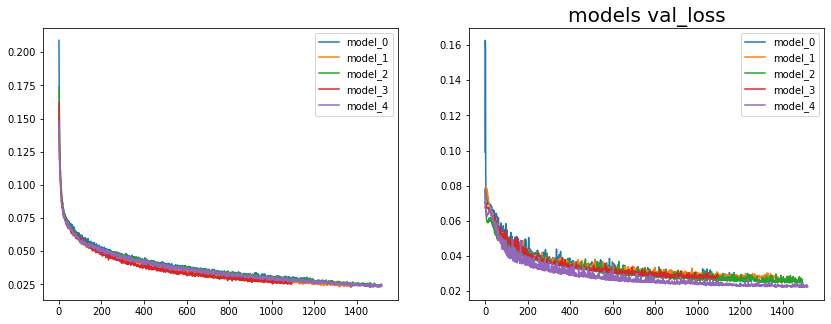

In [91]:
fig = plt.figure(figsize=(14,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax1 = fig.add_subplot(121) ## 그림 뼈대(프레임) 생성
ax2 = fig.add_subplot(122)

for i in range(5) :
    ax1.plot(models_loss[i]['loss'],label=f'model_{i}')
    ax2.plot(models_loss[i]['val_loss'],label=f'model_{i}')

ax1.legend()
plt.title('models loss',fontsize=20) ## 타이틀 설정

ax2.legend()
plt.title('models val_loss',fontsize=20) ## 타이틀 설정
plt.show()

In [92]:
encoder = LabelEncoder()
encoder.fit(y_data)
y = encoder.transform(y_data)


y = (y + 0.5) / 6

print(np.unique(y))

[0.083333 0.25     0.416667 0.583333 0.75     0.916667]


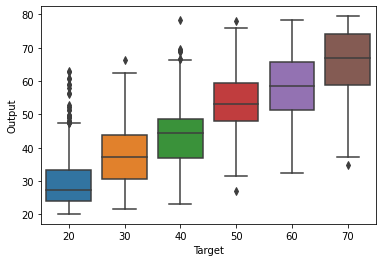

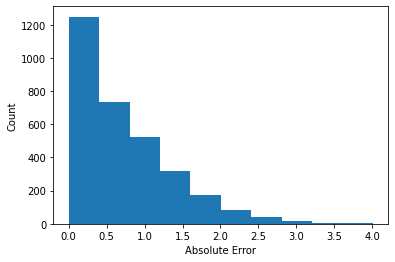

RMSE Test = 0.1621815237024348
오차범위 : 0.0 => 정확도 : 0.00000
오차범위 : 0.1 => 정확도 : 0.11280
오차범위 : 0.2 => 정확도 : 0.21641
오차범위 : 0.3 => 정확도 : 0.30862
오차범위 : 0.4 => 정확도 : 0.39480
오차범위 : 0.5 => 정확도 : 0.47180
오차범위 : 0.6 => 정확도 : 0.52155
오차범위 : 0.7 => 정확도 : 0.57383
오차범위 : 0.8 => 정확도 : 0.62769
오차범위 : 0.9 => 정확도 : 0.67712
오차범위 : 1.0 => 정확도 : 0.72338
오차범위 : 1.1 => 정확도 : 0.76172
오차범위 : 1.2 => 정확도 : 0.79436
오차범위 : 1.3 => 정확도 : 0.82383
오차범위 : 1.4 => 정확도 : 0.84823
오차범위 : 1.5 => 정확도 : 0.86914


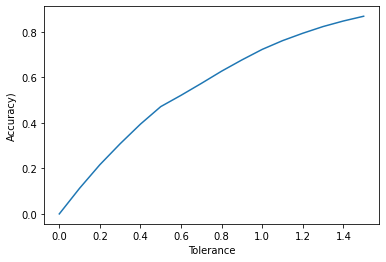

In [93]:
class_cnt = 6
importlib.reload(mt)


# box plot 그리기
mt.drawBoxPlot(o_tests, y, class_cnt)

# 오차정도histogram
plt.hist(np.abs(o_tests.reshape(-1) - y)*class_cnt)
plt.xlabel('Absolute Error')
plt.ylabel('Count')
plt.show()

#rmse for all

rmse_test = np.sqrt(np.mean(np.power(o_tests.reshape(-1, ) - y, 2)))
print(f'RMSE Test = {rmse_test}')

#오차 tollerance 별 정확도
n = 16
acc = np.zeros(n)
for i in range(n):
    th = i/10 # th =  0.1이 한살임
    acc[i] = 1- sum(np.abs(o_tests.reshape(-1) - y)*class_cnt > th)/o_tests.shape[0]
    print(f'오차범위 : {th:0.1f} => 정확도 : {acc[i]:0.5f}')


plt.plot(np.array(range(n))/10, acc)
plt.xlabel('Tolerance')
plt.ylabel('Accuracy)')
plt.show()

In [94]:
cm_merged = np.zeros([6, 6])
count = len(x_test)
for n in range(count):
        #정답
    r = int(y[n]*6)
        #예측값
    c = int(o_tests[n]*6)
    cm_merged[r,c] += 1
    

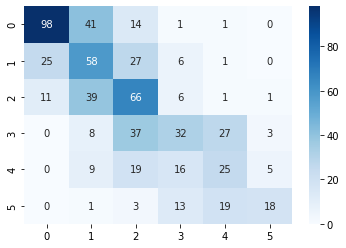

In [95]:
cm_merged_df2 = pd.DataFrame(cm_merged)
sns.heatmap(cm_merged_df2, annot=True , fmt='g', cmap="Blues")
plt.show()

In [96]:
np.corrcoef(o_tests.reshape(-1), y)[0,1]

0.8018953615157942